In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data 

crop_data_path = '../Data-raw/cpdata.csv'
fertilizer_data_path = '../Data-raw/Fertilizer.csv'

crop = pd.read_csv(crop_data_path)
fert = pd.read_csv(fertilizer_data_path)

In [23]:
crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [18]:
crop['humidity'].corr(crop['rainfall'])

0.19207350520500785

In [19]:
crop['humidity'].corr(crop['temperature'])

-0.07699868893452705

### Thus rainfall, humidity and temperature are not correlated, hence all the attributes are important

In [4]:
fert.head(10)

,Unnamed: 0,Crop,N,P,K,pH
0,0,Rice,80,40,40,5.5
1,1,Jowar(Sorghum),80,40,40,5.5
2,2,Barley(JAV),70,40,45,5.5
3,3,Maize,80,40,20,5.5
4,4,Ragi( naachnnii),50,40,20,5.5
5,5,Chickpeas(Channa),40,60,80,5.5
6,6,French Beans(Farasbi),90,125,60,5.0
7,7,Fava beans (Papdi - Val),90,125,60,5.0
8,8,Lima beans(Pavta),40,60,20,5.0
9,9,Cluster Beans(Gavar),25,50,25,5.0


In [5]:
del fert['Unnamed: 0']

In [6]:
fert.head()

,Crop,N,P,K,pH
0,Rice,80,40,40,5.5
1,Jowar(Sorghum),80,40,40,5.5
2,Barley(JAV),70,40,45,5.5
3,Maize,80,40,20,5.5
4,Ragi( naachnnii),50,40,20,5.5


C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N'>

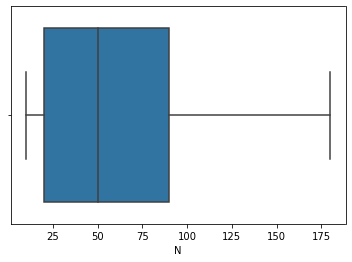

In [34]:
sns.boxplot(fert['N'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P'>

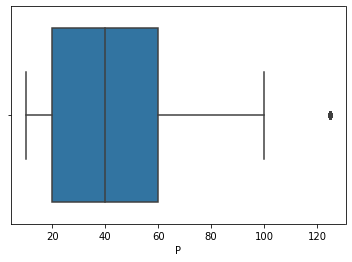

In [35]:
sns.boxplot(fert['P'])

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

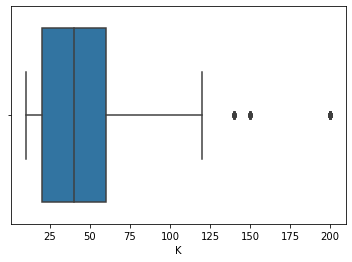

In [36]:
sns.boxplot(fert['K'])

In [7]:
# Function for lowering the cases
def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i

In [8]:
fert['Crop'] = fert['Crop'].apply(change_case)
crop['label'] = crop['label'].apply(change_case)

In [9]:
#make some changes in ferttilizer dataset

fert['Crop'] = fert['Crop'].replace('mungbeans','mungbean')
fert['Crop'] = fert['Crop'].replace('lentils(masoordal)','lentil')
fert['Crop'] = fert['Crop'].replace('pigeonpeas(toordal)','pigeonpeas')
fert['Crop'] = fert['Crop'].replace('mothbean(matki)','mothbeans')
fert['Crop'] = fert['Crop'].replace('chickpeas(channa)','chickpea')

In [10]:
crop_names = crop['label'].unique()
crop_names

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [17]:
crop_names_from_fert = fert['Crop'].unique()
crop_names_from_fert

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpea', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'greenpeas', 'horsegram(kulthi)',
       'blackgram', 'rapeseed(mohri)', 'corianderseeds', 'mustardseeds',
       'sesameseed', 'cuminseeds', 'lentil', 'brinjal', 'beetroot',
       'bittergourd', 'bottlegourd', 'capsicum', 'cabbage', 'carrot',
       'cauliflower', 'cucumber', 'corianderleaves', 'curryleaves',
       'drumstick–moringa', 'chili', 'ladyfinger', 'mushroom', 'onion',
       'potato', 'pumpkin', 'radish', 'olive', 'sweetpotato',
       'fenugreekleaf(methi)', 'spinach', 'ridgegourd',
       'gooseberry(amla)', 'jambun(syzygiumcumini)',
       'ziziphusmauritiana(bor)', 'garciniaindica(kokam)', 'tamarind',
       'tapioca(suran)', 'garlic', 'lemon', 'tomato', 'ashgourd',
       '

In [11]:
crop.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [13]:
extract_labels = []
for i in crop_names_from_fert:
    if i in crop_names:
        extract_labels.append(i)

In [14]:
extract_labels

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [39]:
# using extract labesl on crop to get all the data related to those labels
new_crop = pd.DataFrame(columns = crop.columns)
new_fert = pd.DataFrame(columns = fert.columns)

In [40]:
for label in extract_labels:
    new_crop = new_crop.append(crop[crop['label'] == label])

In [41]:
for label in extract_labels:
    new_fert = new_fert.append(fert[fert['Crop'] == label].iloc[0])

In [42]:
new_crop

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
895,26.774637,66.413269,6.780064,177.774507,coffee
896,27.417112,56.636362,6.086922,127.924610,coffee
897,24.131797,67.225123,6.362608,173.322839,coffee
898,26.272418,52.127394,6.758793,127.175293,coffee


In [43]:
new_fert

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
3,maize,80,40,20,5.5
5,chickpea,40,60,80,5.5
12,kidneybeans,20,60,20,5.5
13,pigeonpeas,20,60,20,5.5
14,mothbeans,20,40,20,5.5
15,mungbean,20,40,20,5.5
18,blackgram,40,60,20,5.0
24,lentil,20,60,20,5.5
60,pomegranate,20,10,40,5.5


In [47]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [48]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [49]:
del merge_fert['Unnamed: 0']

In [50]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [51]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

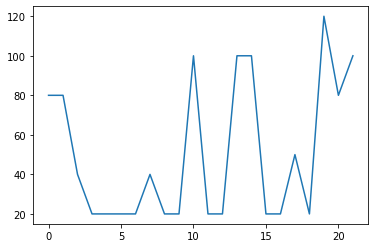

In [52]:
plt.plot(merge_fert["N"])

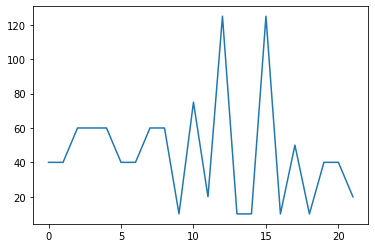

In [53]:
plt.plot(merge_fert["P"])

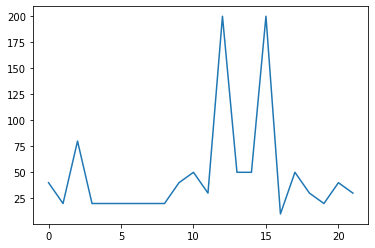

In [54]:
plt.plot(merge_fert["K"])

<AxesSubplot:>

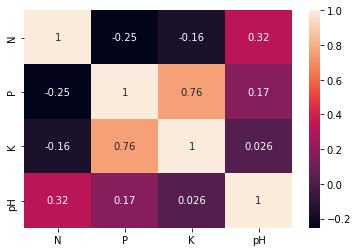

In [55]:
sns.heatmap(merge_fert.corr(),annot=True)

In [56]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [57]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [58]:
temp

,N,P,K
0,73,55,43
1,85,46,36
2,83,52,38
3,61,51,35
4,62,47,36
...,...,...,...
2195,115,32,30
2196,85,23,31
2197,113,27,33
2198,119,25,35


In [59]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [60]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,73,55,43
1,1,21.770462,80.319644,7.038096,226.655537,rice,85,46,36
2,2,23.004459,82.320763,7.840207,263.964248,rice,83,52,38
3,3,26.491096,80.158363,6.980401,242.864034,rice,61,51,35
4,4,20.130175,81.604873,7.628473,262.717340,rice,62,47,36
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,115,32,30
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,85,23,31
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,113,27,33
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,119,25,35


In [61]:
del merge_crop['Unnamed: 0']

In [62]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [63]:
merge_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,55,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,46,36,21.770462,80.319644,7.038096,226.655537,rice
2,83,52,38,23.004459,82.320763,7.840207,263.964248,rice
3,61,51,35,26.491096,80.158363,6.980401,242.864034,rice
4,62,47,36,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,115,32,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,85,23,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,113,27,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,119,25,35,26.272418,52.127394,6.758793,127.175293,coffee


In [65]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [67]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [68]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,55,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,46,36,21.770462,80.319644,7.038096,226.655537,rice
2,83,52,38,23.004459,82.320763,7.840207,263.964248,rice
3,61,51,35,26.491096,80.158363,6.980401,242.864034,rice
4,62,47,36,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,115,32,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,85,23,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,113,27,33,24.131797,67.225123,6.362608,173.322839,coffee
2198,119,25,35,26.272418,52.127394,6.758793,127.175293,coffee
2199,100,15,30,23.603016,60.396475,6.779833,140.937041,coffee


<AxesSubplot:>

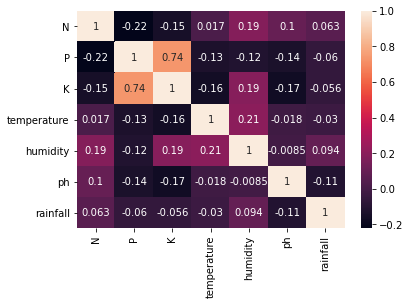

In [70]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [71]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [72]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [73]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.91      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.80      0.95      0.87        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 